In [6]:
import pandas as pd
mcdonalds = pd.read_csv("mcdonalds.csv")

In [7]:
print(mcdonalds.columns)

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


In [8]:
mcdonalds.shape

(1453, 15)

In [9]:
mcdonalds.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [22]:
import numpy as np
mdx = mcdonalds.iloc[:,:11]

In [23]:
mdx

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No


In [25]:
converted_matrix = mdx.replace({"Yes":1,"No":0})
print(converted_matrix.head())

   yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  expensive  \
0      0           1      0          1       0     1      1      0          1   
1      1           1      0          1       1     1      1      1          1   
2      0           1      1          1       1     1      0      1          1   
3      1           1      0          1       1     1      1      1          0   
4      0           1      0          1       1     1      1      0          0   

   healthy  disgusting  
0        0           0  
1        0           0  
2        1           0  
3        0           1  
4        1           0  


In [26]:
average_values = converted_matrix.mean(axis=0).round(2)
print(average_values)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [27]:
from sklearn.decomposition import PCA
pca = PCA()
mc_pca = pca.fit(converted_matrix)

In [31]:
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance = pca.explained_variance_
standard_deviation = np.sqrt(explained_variance)

In [32]:
pca_summary = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(explained_variance_ratio))],
    'Standard Deviation': standard_deviation.round(4),
    'Explained Variance Ratio': explained_variance_ratio.round(4),
    'Cumulative Variance Ratio': explained_variance_ratio.cumsum().round(4)
})

In [33]:
print("PCA Summary:")
print(pca_summary)

PCA Summary:
   Principal Component  Standard Deviation  Explained Variance Ratio  \
0                  PC1              0.7570                    0.2994   
1                  PC2              0.6075                    0.1928   
2                  PC3              0.5046                    0.1330   
3                  PC4              0.3988                    0.0831   
4                  PC5              0.3374                    0.0595   
5                  PC6              0.3103                    0.0503   
6                  PC7              0.2897                    0.0438   
7                  PC8              0.2751                    0.0395   
8                  PC9              0.2653                    0.0368   
9                 PC10              0.2488                    0.0324   
10                PC11              0.2369                    0.0293   

    Cumulative Variance Ratio  
0                      0.2994  
1                      0.4922  
2                      0.6

In [34]:
standard_deviation = np.sqrt(pca.explained_variance_)
rotation = pca.components_.T
features = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 
            'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']
rotation_df = pd.DataFrame(rotation, columns=[f'PC{i+1}' for i in range(rotation.shape[1])], index=features)
print("Standard deviations (1, .., p=11):")
print(np.round(standard_deviation, 1))
print("\nRotation (n x k) = (11 x 11):")
print(rotation_df.round(3))

Standard deviations (1, .., p=11):
[0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]

Rotation (n x k) = (11 x 11):
              PC1    PC2    PC3    PC4    PC5    PC6    PC7    PC8    PC9  \
yummy       0.477 -0.364  0.304  0.055  0.308 -0.171 -0.281 -0.013 -0.572   
convenient  0.155 -0.016  0.063 -0.142 -0.278  0.348 -0.060  0.113  0.018   
spicy       0.006 -0.019  0.037  0.198 -0.071  0.355  0.708 -0.376 -0.400   
fattening  -0.116  0.034  0.322 -0.354  0.073  0.407 -0.386 -0.590  0.161   
greasy     -0.304  0.064  0.802  0.254 -0.361 -0.209  0.036  0.138  0.003   
fast        0.108  0.087  0.065 -0.097 -0.108  0.595 -0.087  0.628 -0.166   
cheap       0.337  0.611  0.149  0.119  0.129  0.103 -0.040 -0.140 -0.076   
tasty       0.472 -0.307  0.287 -0.003  0.211  0.077  0.360  0.073  0.639   
expensive  -0.329 -0.601 -0.024  0.068  0.003  0.261 -0.068 -0.030 -0.067   
healthy     0.214 -0.077 -0.192  0.763 -0.288  0.178 -0.350 -0.176  0.186   
disgusting -0.375  0.140  0.089  0.370  0

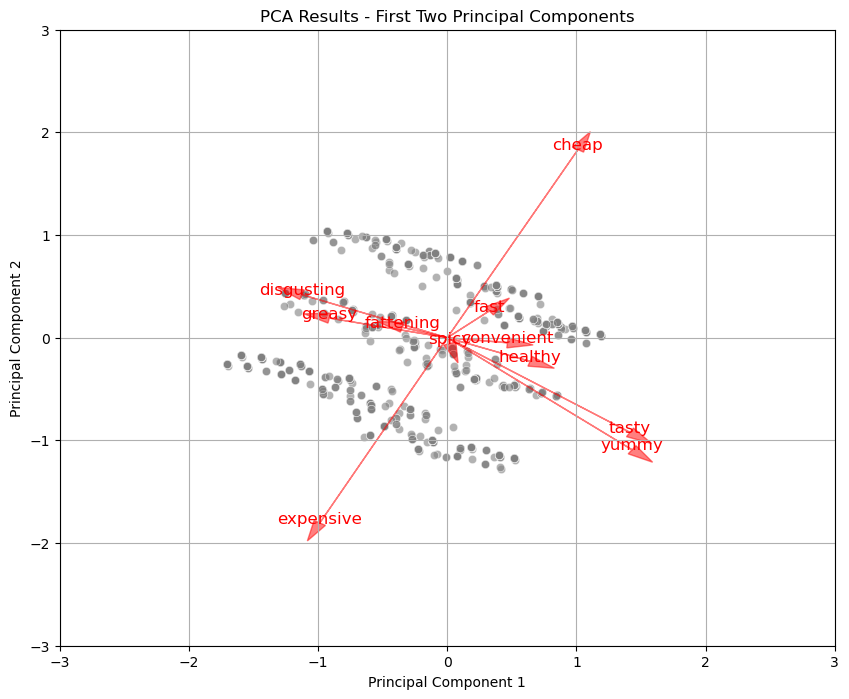

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
pca_scores = mc_pca.transform(converted_matrix)
pca_df = pd.DataFrame(data=pca_scores, columns=[f'PC{i+1}' for i in range(pca_scores.shape[1])])
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, color='grey', alpha=0.6)
plt.title('PCA Results - First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
features = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 
            'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']
for i in range(len(pca.components_)):
    # Draw the arrow
    plt.arrow(0, 0, pca.components_[0, i] * 3, pca.components_[1, i] * 3, 
              head_width=0.1, head_length=0.2, fc='r', ec='r', alpha=0.5)
    # Add the feature name for each principal component
    plt.text(pca.components_[0, i] * 3, pca.components_[1, i] * 3, features[i], 
             fontsize=12, ha='center', color='red')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()

In [52]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import warnings
warnings.filterwarnings("ignore") 

In [53]:
np.random.seed(1234)
clusters = {}
for n_clusters in range(2, 9):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
    kmeans.fit(converted_matrix)
    clusters[n_clusters] = kmeans.labels_

def relabel_clusters(clusters):
    relabeled = {}
    for n_clusters, labels in clusters.items():
        # Use Counter to find the most common label for each cluster
        most_common = Counter(labels).most_common(n_clusters)
        mapping = {label: i for i, (label, _) in enumerate(most_common)}
        # Relabel based on the mapping
        relabeled[n_clusters] = np.array([mapping[label] for label in labels])
    return relabeled
MD_km28 = relabel_clusters(clusters)
for n_clusters in range(2, 9):
    print(f"Relabeled clusters for {n_clusters} clusters:")
    print(MD_km28[n_clusters])

Relabeled clusters for 2 clusters:
[1 0 0 ... 0 0 1]
Relabeled clusters for 3 clusters:
[1 2 2 ... 2 0 1]
Relabeled clusters for 4 clusters:
[1 2 2 ... 2 0 3]
Relabeled clusters for 5 clusters:
[2 1 3 ... 3 0 4]
Relabeled clusters for 6 clusters:
[0 4 1 ... 1 5 3]
Relabeled clusters for 7 clusters:
[5 0 2 ... 2 6 4]
Relabeled clusters for 8 clusters:
[2 4 4 ... 6 7 3]


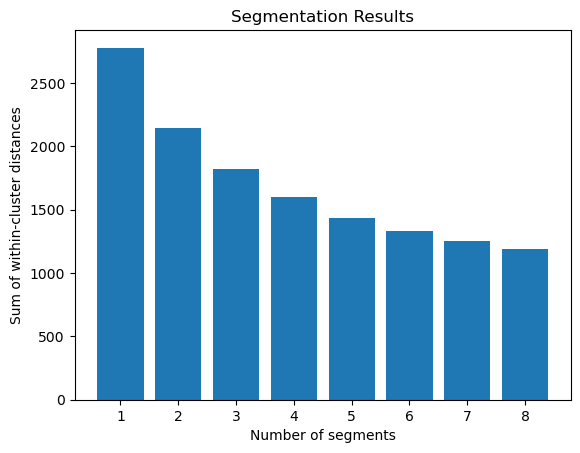

In [59]:
np.random.seed(1234)

nrep = 10

num_segments = range(1, 9)
within_cluster_distances = []
MD_km28 = {}

for k in num_segments:
    kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
    kmeans.fit(converted_matrix)
    within_cluster_distances.append((kmeans.inertia_))
    MD_km28[str(k)] = kmeans

plt.bar(num_segments, within_cluster_distances)
plt.xlabel("Number of segments")
plt.ylabel("Sum of within-cluster distances")
plt.title("Segmentation Results")
plt.show()

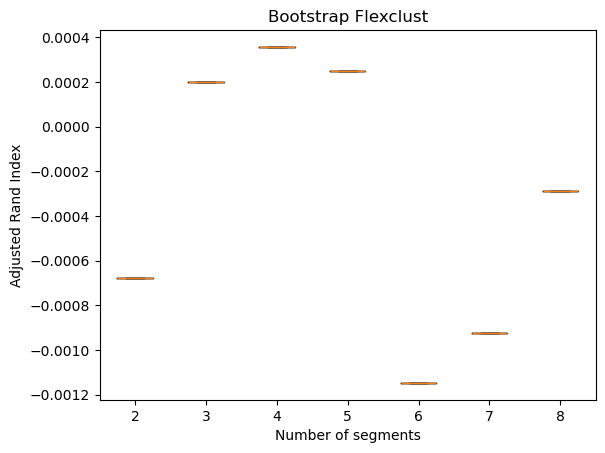

In [61]:
from sklearn.utils import resample
np.random.seed(1234) 
nboot = 100  
nrep = 10  

bootstrap_samples = []
for _ in range(nboot):
    bootstrap_sample = resample(converted_matrix.values, random_state=1234) 
    bootstrap_samples.append(bootstrap_sample)

adjusted_rand_index = []
num_segments = range(2, 9)
for k in num_segments:
    stability_scores = []
    for bootstrap_sample in bootstrap_samples:
        kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)  
        kmeans.fit(bootstrap_sample)
        cluster_labels = kmeans.predict(bootstrap_sample)
        true_labels = kmeans.predict(converted_matrix.values)
        stability_score = adjusted_rand_score(true_labels, cluster_labels)
        stability_scores.append(stability_score)
    adjusted_rand_index.append(stability_scores)

# Transpose the adjusted_rand_index list
adjusted_rand_index = np.array(adjusted_rand_index).T

# Create boxplot of adjusted Rand index
plt.boxplot(adjusted_rand_index, labels=num_segments, whis=10)
plt.xlabel("Number of segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Bootstrap Flexclust")
plt.show()


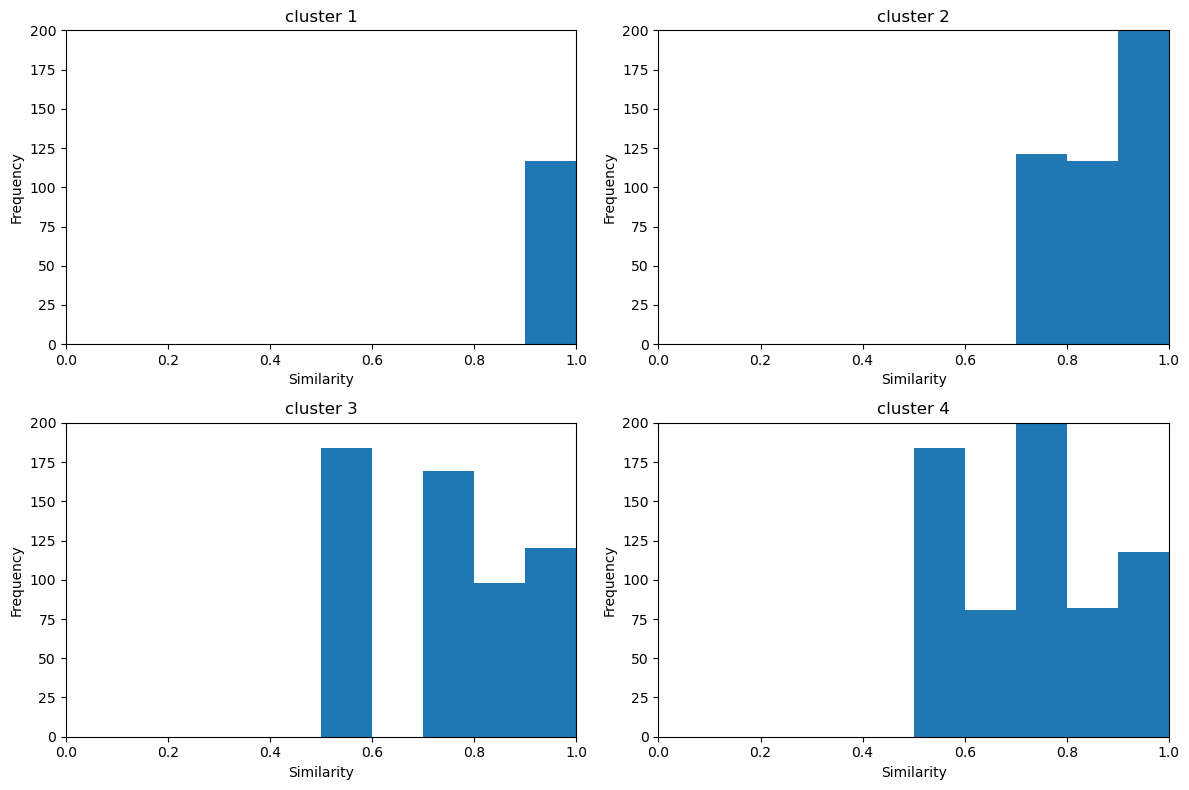

In [62]:
range_values = (0, 1)
num_bins = 10
max_frequency = 200


fig, axs = plt.subplots(2, 2, figsize=(12, 8))


for i in range(1, 5):
    labels = MD_km28[str(i)].predict(converted_matrix)
    similarities = MD_km28[str(i)].transform(converted_matrix).min(axis=1)
    row = (i - 1) // 2
    col = (i - 1) % 2

    axs[row, col].hist(similarities, bins=num_bins, range=range_values)
    axs[row, col].set_xlabel('Similarity')
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].set_title('cluster {}'.format(i))

    axs[row, col].set_xlim(range_values)
    axs[row, col].set_ylim(0, max_frequency)


    axs[row, col].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])

plt.tight_layout()
plt.show()


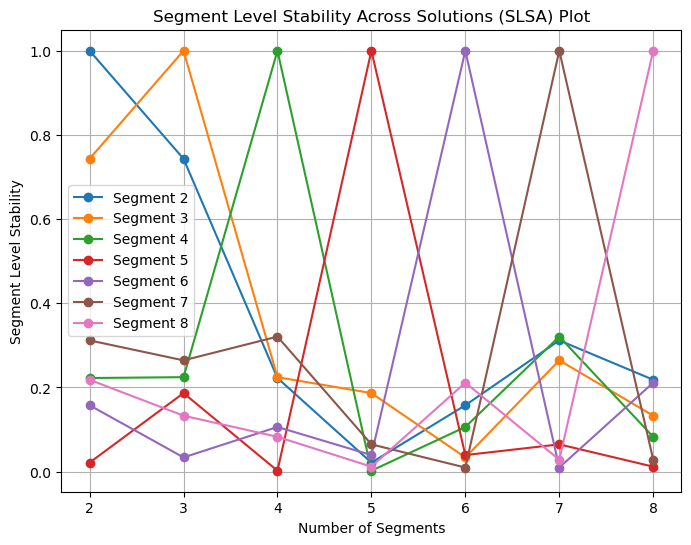

In [63]:
num_segments = range(2, 9)

segment_stability = []
for segment in range(2, 9):
    labels_segment = MD_km28[str(segment)].predict(converted_matrix)
    segment_stability.append(labels_segment)

plt.figure(figsize=(8, 6))
for i, segment in enumerate(range(2, 9)):
    plt.plot(num_segments, [np.mean(segment_stability[i] == labels) for labels in segment_stability], marker='o', label=f'Segment {segment}')

plt.xlabel('Number of Segments')
plt.ylabel('Segment Level Stability')
plt.title('Segment Level Stability Across Solutions (SLSA) Plot')
plt.xticks(num_segments)
plt.legend()
plt.grid(True)

plt.show()

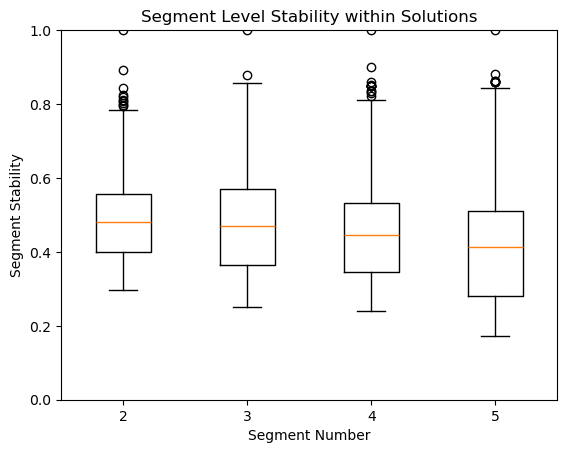

In [64]:
segment_solutions = ["2", "3", "4", "5"]
segment_labels = {}
segment_similarities = {}

for segment in segment_solutions:
    segment_labels[segment] = MD_km28[segment].predict(converted_matrix)
    segment_similarities[segment] = MD_km28[segment].transform(converted_matrix).min(axis=1)

segment_stability_values = []
for segment in segment_solutions:
    similarities = segment_similarities[segment]
    normalized_similarities = similarities / np.max(similarities) 
    segment_stability_values.append(normalized_similarities)

plt.boxplot(segment_stability_values, whis=1.5)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.xticks(range(1, len(segment_solutions) + 1), segment_solutions)
plt.ylim(0, 1)
plt.title("Segment Level Stability within Solutions")

plt.show()

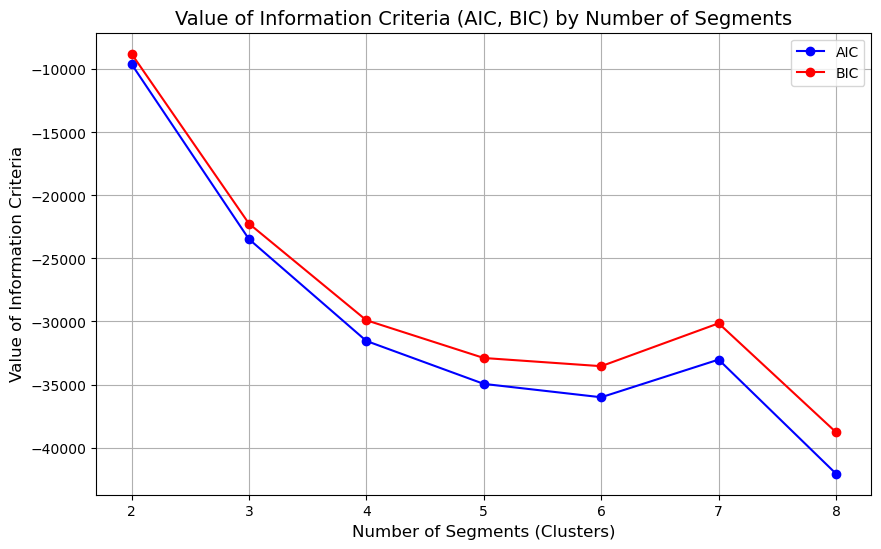

In [65]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Example data creation (Replace with your actual binary data matrix)
np.random.seed(1234)
MD_x = np.random.choice([0, 1], size=(100, 11))  # Example binary data matrix

# Information criteria calculation functions
def calculate_aic_bic(model, X):
    """Calculate AIC and BIC for a fitted clustering model."""
    bic = model.bic(X)
    aic = model.aic(X)
    return aic, bic

# Set up range of clusters and initialize lists to store criteria
n_clusters_range = range(2, 9)
aic_values = []
bic_values = []

# Fit models and calculate AIC, BIC
for n_clusters in n_clusters_range:
    gmm = GaussianMixture(n_components=n_clusters, covariance_type='full', random_state=1234)
    gmm.fit(converted_matrix)
    aic, bic = calculate_aic_bic(gmm, converted_matrix)
    aic_values.append(aic)
    bic_values.append(bic)

# Plotting AIC and BIC values
plt.figure(figsize=(10, 6))
plt.plot(n_clusters_range, aic_values, marker='o', linestyle='-', color='blue', label='AIC')
plt.plot(n_clusters_range, bic_values, marker='o', linestyle='-', color='red', label='BIC')
plt.xlabel('Number of Segments (Clusters)', fontsize=12)
plt.ylabel('Value of Information Criteria', fontsize=12)
plt.title('Value of Information Criteria (AIC, BIC) by Number of Segments', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

In [66]:
from sklearn.mixture import GaussianMixture
k = 4
kmeans = KMeans(n_clusters=k, random_state=1234)
kmeans.fit(converted_matrix)
kmeans_clusters = kmeans.predict(converted_matrix)

gmm = GaussianMixture(n_components=k, random_state=1234)
gmm.fit(converted_matrix)
gmm_clusters = gmm.predict(converted_matrix)

results = pd.DataFrame({'kmeans': kmeans_clusters, 'mixture': gmm_clusters})

MD_m4 = converted_matrix[results['mixture'] == 3] 

k4_m4 = KMeans(n_clusters=k, random_state=1234)
k4_m4.fit(MD_m4)
k4_m4_clusters = k4_m4.predict(MD_m4)

results_m4 = pd.DataFrame({'kmeans': k4_m4_clusters, 'mixture': 3})

print(pd.crosstab(results['kmeans'], results['mixture']))
print(pd.crosstab(results['kmeans'], results_m4['kmeans']))

mixture    0    1    2    3
kmeans                     
0        508    0    4   39
1          0  215   11    4
2         44    3  267    8
3          0   36   15  299
kmeans   0   1   2   3
kmeans                
0       22  29  14  73
1        9  10   7  26
2       15  14   5  42
3        9  20  13  42


In [67]:
gmm_m4a = GaussianMixture(n_components=4)
gmm_m4a.fit(converted_matrix)

log_likelihood_m4a = gmm_m4a.score(converted_matrix)

gmm_m4 = GaussianMixture(n_components=4)
gmm_m4.fit(converted_matrix)

log_likelihood_m4 = gmm_m4.score(converted_matrix)

print("Log-likelihood for MD.m4a:", log_likelihood_m4a)
print("Log-likelihood for MD.m4:", log_likelihood_m4)

Log-likelihood for MD.m4a: 7.489284415174756
Log-likelihood for MD.m4: 7.264647077801998


In [69]:
like_counts = pd.value_counts(mcdonalds['Like'])
reversed_counts = like_counts.iloc[::-1]

print(reversed_counts)

Like
-1               58
-2               59
-4               71
-3               73
I love it!+5    143
I hate it!-5    152
+1              152
+4              160
0               169
+2              187
+3              229
Name: count, dtype: int64


In [70]:
like_mapping = {
    'I HATE IT!-5': -5,
    '-4': -4,
    '-3': -3,
    '-2': -2,
    '-1': -1,
    '0': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    'I LOVE IT!+5': 5
}

mcdonalds['Like.n'] = mcdonalds['Like'].map(like_mapping)


like_n_counts = mcdonalds['Like.n'].value_counts()


print(like_n_counts)

Like.n
 0.0    169
-3.0     73
-4.0     71
-2.0     59
-1.0     58
Name: count, dtype: int64


In [71]:
from patsy import dmatrices

independent_vars = mcdonalds.columns[0:11] 

formula_str = ' + '.join(independent_vars)

formula_str = 'Like ~ ' + formula_str


f = dmatrices(formula_str, data=mcdonalds)[1]

print(f)

[[1. 0. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 1. 1. 0.]
 ...
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 1. 0. 1.]]


In [72]:
from sklearn.mixture import GaussianMixture
from patsy import dmatrix
np.random.seed(1234)

X = dmatrix(f.design_info, data=mcdonalds)
y = dmatrix('Like', data=mcdonalds)

n_components = 2
n_init = 10
verbose = False
n_rep=10

model = GaussianMixture(n_components=n_components, n_init=n_init, verbose=verbose)
MD_reg2 = model.fit(X, y)

print(MD_reg2)
cluster_sizes = np.bincount(model.predict(X))

print("Cluster sizes:")
for i, size in enumerate(cluster_sizes):
    print(f"{i+1}: {size}")

GaussianMixture(n_components=2, n_init=10, verbose=False)
Cluster sizes:
1: 985
2: 468


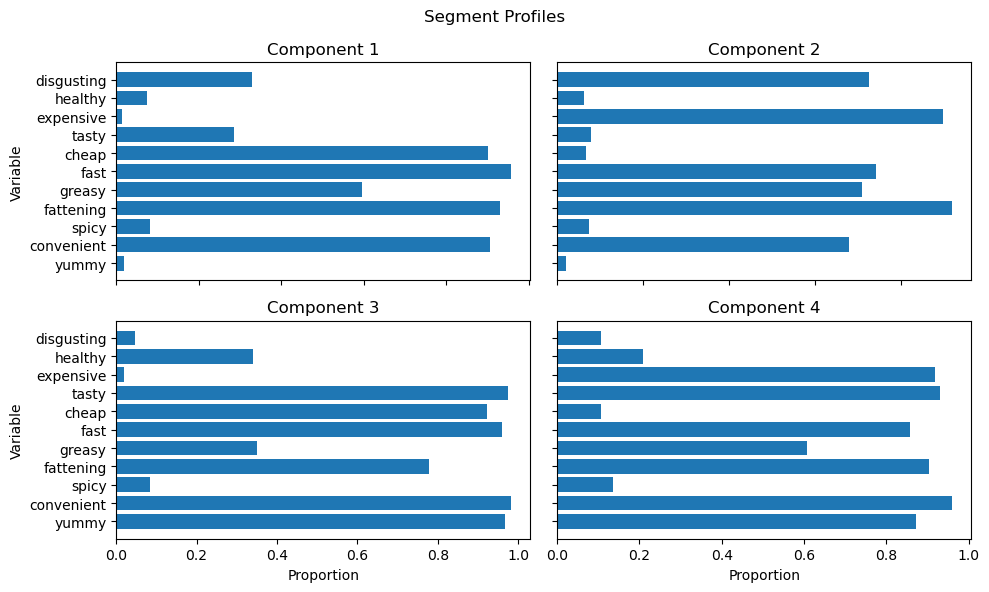

In [73]:
kmeans = MD_km28['4']

labels = kmeans.labels_

MD_mean = converted_matrix.groupby(labels).mean()

fig, axs = plt.subplots(2, 2, figsize=(10, 6))
axs[0, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[0])
axs[0, 0].set_title('Component 1')
axs[0, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[1])
axs[0, 1].set_title('Component 2')
axs[1, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[2])
axs[1, 0].set_title('Component 3')
axs[1, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[3])
axs[1, 1].set_title('Component 4')

for ax in axs.flat:
    ax.set(ylabel='Variable', xlabel='Proportion')
    ax.set_yticks(range(MD_mean.shape[1]))
    ax.set_yticklabels(converted_matrix.columns)

for ax in axs.flat:
    ax.label_outer()

fig.suptitle('Segment Profiles')

fig.tight_layout()

plt.show()

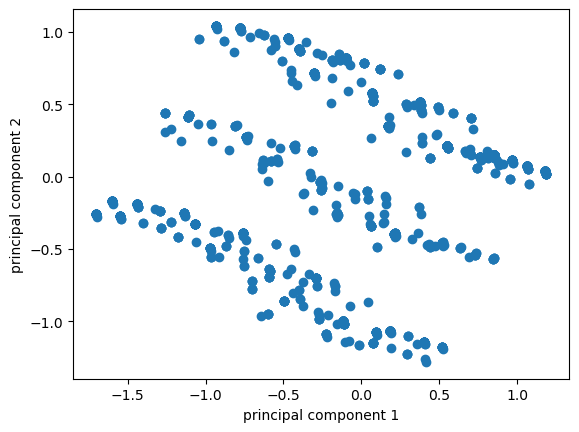

In [75]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(converted_matrix)

pca = PCA(n_components=2)
MD_pca = pca.fit_transform(converted_matrix)

fig, ax = plt.subplots()

ax.scatter(MD_pca[:, 0], MD_pca[:, 1])
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
plt.show()

<Figure size 800x600 with 0 Axes>

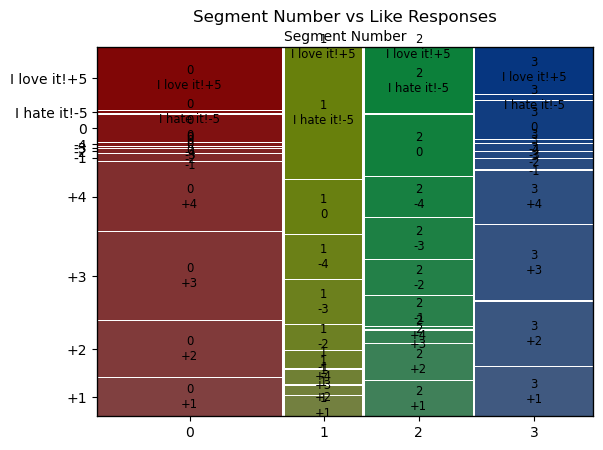

In [84]:
import pandas as pd
from sklearn.cluster import KMeans
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt

# Assuming `MD_k4` is the KMeans model with 4 clusters
# and `data` is the DataFrame containing the `Like` column.

# Step 1: Perform KMeans with 4 clusters and add the cluster labels to the data
kmeans = KMeans(n_clusters=4, random_state=1234)
mcdonalds['Cluster'] = kmeans.fit_predict(mcdonalds.iloc[:, :11])  # Assuming first 11 columns for clustering

# Step 2: Create a contingency table (cross-tabulation)
contingency_table = pd.crosstab(mcdonalds['Cluster'], mcdonalds['Like'])

# Step 3: Plot the mosaic plot
plt.figure(figsize=(8, 6))
mosaic(contingency_table.stack(), title='Segment Number vs Like Responses')
plt.xlabel("Segment Number")
plt.ylabel("Proportion of 'Like' Responses")
plt.show()


<Figure size 800x600 with 0 Axes>

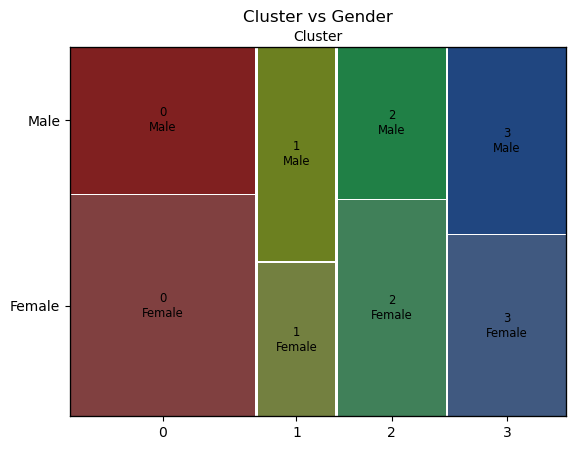

In [85]:
kmeans = KMeans(n_clusters=4, random_state=1234)
mcdonalds['Cluster'] = kmeans.fit_predict(mcdonalds.iloc[:, :11])  # Replace 11 with the appropriate column range if needed

# Step 2: Create a contingency table (cross-tabulation) between Cluster and Gender
contingency_table = pd.crosstab(mcdonalds['Cluster'], mcdonalds['Gender'])

# Step 3: Plot the mosaic plot
plt.figure(figsize=(8, 6))
mosaic(contingency_table.stack(), title='Cluster vs Gender')
plt.xlabel("Cluster")
plt.ylabel("Proportion of Gender")
plt.show()

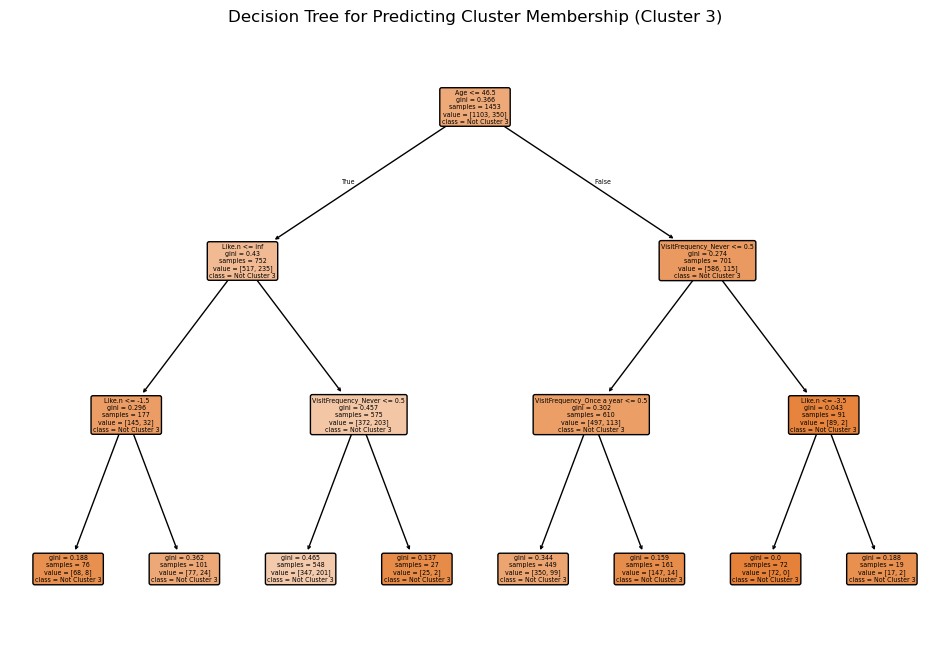

In [86]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Assume `data` is the DataFrame containing 'Like.n', 'Age', 'VisitFrequency', 'Gender', and cluster labels in 'Cluster'
# Step 1: Define the target and predictor variables
# Create a binary target indicating whether the cluster is equal to 3
mcdonalds['Target'] = (mcdonalds['Cluster'] == 3).astype(int)

# Define predictors
predictors = ['Like.n', 'Age', 'VisitFrequency', 'Gender']

# Convert categorical predictors to dummy variables (One-hot encoding for Gender, etc.)
data_encoded = pd.get_dummies(mcdonalds[predictors], drop_first=True)

# Step 2: Fit the Decision Tree model
clf = DecisionTreeClassifier(random_state=1234, max_depth=3, min_samples_split=20)  # Parameters to simulate ctree's behavior
clf.fit(data_encoded, mcdonalds['Target'])

# Step 3: Plot the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=data_encoded.columns, class_names=["Not Cluster 3", "Cluster 3"], filled=True, rounded=True)
plt.title("Decision Tree for Predicting Cluster Membership (Cluster 3)")
plt.show()

In [88]:
like = mcdonalds.groupby('Cluster')['Like.n'].mean()

# Display the results
print("Mean 'Like.n' by Cluster:")
print(like)

Mean 'Like.n' by Cluster:
Cluster
0   -0.687500
1   -2.025424
2   -1.849462
3   -0.838710
Name: Like.n, dtype: float64


In [93]:
mcdonalds['Female'] = (mcdonalds['Gender'] == 'Female').astype(int)

# Step 2: Calculate the mean of 'Female' for each cluster
female_proportion = mcdonalds.groupby('Cluster')['Female'].mean()

# Display the results
print("Proportion of Females by Cluster:")
print(female_proportion)

Proportion of Females by Cluster:
Cluster
0    0.600726
1    0.417391
2    0.586957
3    0.491429
Name: Female, dtype: float64
